In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Module containing custom functions
import models.data as mdt
import models.report as rpt

# Remove warnings display
import warnings
warnings.filterwarnings('ignore')

# Fix issue with libomp conflicts
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
# Load data and display head
trip_data_df = mdt.load_dataset_as_dataframe('C:/Users/Megha/Downloads/TripData/processed-data')
trip_data_df.head()

,time,speed,shift,engine_Load,car_accel,rpm,pitch,lateral_acceleration,passenger_count,car_load,ac_status,window_opening,radio_volume,rain_intensity,visibility,driver_wellbeing,driver_rush,idx
0,0.022,0.0,0,0.0,0.0,0.0,0.051337,-0.0,0,3,0,2,6,0,9,5,3,0
1,0.033,0.0,0,0.0,0.0,0.0,0.052761,-0.0,0,3,0,2,6,0,9,5,3,1
2,0.038,0.0,0,0.0,0.0,0.0,0.054212,-0.0,0,3,0,2,6,0,9,5,3,2
3,0.048,0.0,0,0.0,0.0,0.0,0.055728,-0.0,0,3,0,2,6,0,9,5,3,3
4,0.058,0.0,0,0.0,0.0,0.0,0.057125,-0.0,0,3,0,2,6,0,9,5,3,4


In [3]:
# Display data info / describe
trip_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7748753 entries, 0 to 7748752
Data columns (total 18 columns):
 #   Column                Dtype  
---  ------                -----  
 0   time                  float64
 1   speed                 float64
 2   shift                 int64  
 3   engine_Load           float64
 4   car_accel             float64
 5   rpm                   float64
 6   pitch                 float64
 7   lateral_acceleration  float64
 8   passenger_count       int64  
 9   car_load              int64  
 10  ac_status             int64  
 11  window_opening        int64  
 12  radio_volume          int64  
 13  rain_intensity        int64  
 14  visibility            int64  
 15  driver_wellbeing      int64  
 16  driver_rush           int64  
 17  idx                   int64  
dtypes: float64(7), int64(11)
memory usage: 1.0 GB


In [4]:
# Display dataframe describe
trip_data_df.describe()

,time,speed,shift,engine_Load,car_accel,rpm,pitch,lateral_acceleration,passenger_count,car_load,ac_status,window_opening,radio_volume,rain_intensity,visibility,driver_wellbeing,driver_rush,idx
count,7.748753e+06,7.748753e+06,7.748753e+06,7.748753e+06,7.748753e+06,7.748753e+06,7.748753e+06,7.748753e+06,7.748753e+06,7.748753e+06,7.748753e+06,7.748753e+06,7.748753e+06,7.748753e+06,7.748753e+06,7.748753e+06,7.748753e+06,7.748753e+06
mean,3.878057e+04,7.849732e+00,1.760373e+00,7.749423e+00,1.598307e-01,1.594698e+03,9.360308e-01,-1.385369e-02,4.389443e-01,3.821738e+00,1.267436e-01,7.531711e-01,3.965360e+00,3.229290e-01,9.476609e+00,5.820096e+00,2.833010e+00,3.874376e+06
std,2.237610e+04,7.356323e+00,1.867546e+00,7.092646e+00,7.980135e-01,7.070260e+02,2.259470e+00,4.297008e-01,8.644514e-01,1.708074e+00,4.159354e-01,1.402824e+00,2.014243e+00,7.256086e-01,7.653467e-01,1.450747e+00,1.300116e+00,2.236872e+06
min,2.200000e-02,-5.030800e+01,0.000000e+00,-1.000000e+00,-7.377400e+01,-1.000000e+00,-5.302900e+01,-5.963300e+00,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00
25%,1.940755e+04,5.909900e-01,0.000000e+00,3.100000e+00,-1.933200e-01,8.814200e+02,3.430900e-01,-4.617100e-02,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,9.000000e+00,5.000000e+00,2.000000e+00,1.937188e+06
50%,3.878030e+04,6.673900e+00,1.000000e+00,4.622100e+00,1.550200e-01,1.579500e+03,1.144500e+00,-1.071600e-07,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00,1.000000e+01,6.000000e+00,3.000000e+00,3.874376e+06
75%,5.815560e+04,1.223000e+01,3.000000e+00,1.002200e+01,4.934900e-01,2.080800e+03,1.809800e+00,3.239900e-02,1.000000e+00,3.000000e+00,0.000000e+00,1.000000e+00,5.000000e+00,0.000000e+00,1.000000e+01,7.000000e+00,3.000000e+00,5.811564e+06
max,7.753656e+04,3.234300e+01,5.000000e+00,7.535900e+01,6.485500e+00,6.060300e+03,1.481900e+01,5.776800e+00,4.000000e+00,8.000000e+00,4.000000e+00,6.000000e+00,8.000000e+00,3.000000e+00,1.000000e+01,8.000000e+00,5.000000e+00,7.748752e+06


In [5]:
# Counting number of missing values
trip_data_df.isna().count()

time                    7748753
speed                   7748753
shift                   7748753
engine_Load             7748753
car_accel               7748753
rpm                     7748753
pitch                   7748753
lateral_acceleration    7748753
passenger_count         7748753
car_load                7748753
ac_status               7748753
window_opening          7748753
radio_volume            7748753
rain_intensity          7748753
visibility              7748753
driver_wellbeing        7748753
driver_rush             7748753
idx                     7748753
dtype: int64

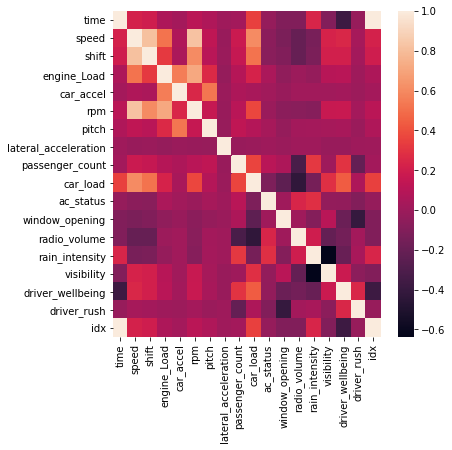

In [6]:
# Plot correlation heatmap.
plt.figure(figsize=(6,6))
sns.heatmap(trip_data_df.corr());

**Observations** : 
* `idx` | `time` : The `idx` feature has been built during the CSV files aggregation process in order to keep the timeseries order and it is highly related to the time feature as it increases over time.
* `speed` | `shift` | `engine_load` | `rpm` : Not so surprisingly `speed`, `shift`, `engine_load` and `rpm` are highly correlated.
* `rain_intensity` | `visibility` : Negatively correlated, the more rain the less visibility.
* `car_load` | `radio_volume`: The more people in the car the less radio volume.

In [ ]:
# Plot features distributions.
mdt.plot_feature_distributions(trip_data_df, figsize=(24,44))

**Observations** : The `speed` and `car_accel` distributions show outliers in the observations. Those outliers should be removed from the dataset.

In [7]:
# Removes outliers from dataset
cleaned_df = trip_data_df[trip_data_df.speed > -10 ][trip_data_df.car_accel > -10]
#mdt.plot_feature_distributions(cleaned_df, figsize=(24,44))

**Breaking Events logic** :
In order to analyse the braking events during the trips, we need to extract the related time series from the existing dataframe.
This operation is made by first filtering out the observations where `car_accel` are below a specific threshold (-2$m/s^2$ in our case)
and then generate a list of brake event time series.

In [8]:
# Extracting braking events
braking_entries_df = mdt.filter_acceleration_entries(cleaned_df, threshold=-2, above=False)
braking_events = mdt.extract_events(braking_entries_df)
braking_events[0]  # Display first element

,time,speed,shift,engine_Load,car_accel,rpm,pitch,lateral_acceleration,passenger_count,car_load,ac_status,window_opening,radio_volume,rain_intensity,visibility,driver_wellbeing,driver_rush,idx
3164,31.659,1.07950,0,16.870,-2.0129,1763.7,-9.3963,0.002699,0,3,0,2,6,0,9,5,3,3164
3165,31.669,1.07360,0,16.913,-2.0333,1767.1,-9.4169,0.002684,0,3,0,2,6,0,9,5,3,3165
3166,31.679,1.07070,0,16.954,-2.0518,1770.4,-9.4374,0.004818,0,3,0,2,6,0,9,5,3,3166
3167,31.689,1.06620,0,16.992,-2.0684,1773.6,-9.4577,0.004798,0,3,0,2,6,0,9,5,3,3167
3168,31.699,1.05960,0,17.029,-2.0834,1776.6,-9.4779,0.003709,0,3,0,2,6,0,9,5,3,3168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4332,43.338,0.83855,0,13.306,-2.0395,1572.1,-11.8870,-0.002935,0,3,0,2,6,0,9,5,3,4332
4333,43.348,0.83829,0,13.233,-2.0298,1568.7,-11.8190,-0.001257,0,3,0,2,6,0,9,5,3,4333
4334,43.358,0.83803,0,13.157,-2.0205,1565.1,-11.7510,-0.001257,0,3,0,2,6,0,9,5,3,4334
4335,43.368,0.83895,0,13.079,-2.0116,1561.5,-11.6830,-0.000419,0,3,0,2,6,0,9,5,3,4335


In [9]:
# Calculate braking events metrics
braking_event_metrics_df = mdt.get_events_metrics(braking_events)
braking_event_metrics_df.head()

,observations,speed_mean,speed_std,speed_min,speed_25,speed_50,speed_75,speed_max,car_accel_mean,car_accel_std,...,shift_std,shift_min,shift_25,shift_50,shift_75,shift_max,driver_rush,visibility,rain_intensity,driver_wellbeing
0,899.0,0.333279,0.399563,-0.074911,0.000062,0.084907,0.824625,1.1111,-2.432853,0.267227,...,0.000000,0.0,0.0,0.0,0.0,0.0,3.0,9.0,0.0,5.0
1,26.0,0.938083,0.098342,0.767270,0.859820,0.944385,1.018125,1.0919,-2.142638,0.073721,...,0.000000,0.0,0.0,0.0,0.0,0.0,3.0,9.0,0.0,5.0
2,388.0,5.861001,2.713312,1.848600,3.291000,5.560600,8.467825,10.3480,-2.902671,0.686170,...,1.581581,0.0,0.0,0.0,0.0,4.0,3.0,9.0,0.0,5.0
3,90.0,2.631230,0.705815,1.410100,1.890625,2.723000,3.223125,3.7129,-2.044453,0.024362,...,0.000000,0.0,0.0,0.0,0.0,0.0,3.0,9.0,1.0,5.0
4,26.0,21.258808,0.115110,21.070000,21.164500,21.260500,21.353500,21.4470,-2.022212,0.010778,...,0.000000,5.0,5.0,5.0,5.0,5.0,3.0,9.0,1.0,5.0


In [10]:
# Rescale numerical data
rescaled_braking_df = mdt.rescale_events_metrics(braking_event_metrics_df)
rescaled_braking_df.head()

,speed_mean,speed_std,speed_min,speed_25,speed_50,speed_75,speed_max,car_accel_mean,car_accel_std,car_accel_min,...,shift_std,shift_min,shift_25,shift_50,shift_75,shift_max,driver_rush,visibility,rain_intensity,driver_wellbeing
0,-1.433884,-0.595230,-1.176520,-1.347481,-1.483563,-1.424325,-1.454976,-0.214922,0.409955,-1.023587,...,-0.524587,-0.344453,-0.37677,-0.450495,-0.559719,-0.710157,3.0,9.0,0.0,5.0
1,-1.282748,-0.951530,-0.963506,-1.129138,-1.270574,-1.378508,-1.459305,0.570576,-0.623270,0.651040,...,-0.524587,-0.344453,-0.37677,-0.450495,-0.559719,-0.710157,3.0,9.0,0.0,5.0
2,-0.052549,2.141605,-0.690005,-0.511717,-0.126623,0.385403,0.628061,-1.486541,2.646899,-1.872788,...,2.338403,-0.344453,-0.37677,-0.450495,-0.559719,1.915745,3.0,9.0,0.0,5.0
3,-0.859644,-0.232977,-0.800915,-0.867355,-0.829813,-0.856417,-0.868237,0.836326,-0.886827,0.873247,...,-0.524587,-0.344453,-0.37677,-0.450495,-0.559719,-0.710157,3.0,9.0,1.0,5.0
4,3.795247,-0.931696,4.171670,4.027420,3.763992,3.436423,3.131024,0.896526,-0.959358,0.946519,...,-0.524587,4.587102,4.14601,3.568357,3.027127,2.572221,3.0,9.0,1.0,5.0


In [11]:
# Numbers of braking in dataset
len(rescaled_braking_df)

587

In [12]:
# Sort entries by driver rush feature for better visualisation.
sorted_braking_df = rescaled_braking_df.sort_values(by=['driver_rush', 'car_accel_25']).reset_index()
sorted_braking_df.head()

,index,speed_mean,speed_std,speed_min,speed_25,speed_50,speed_75,speed_max,car_accel_mean,car_accel_std,...,shift_std,shift_min,shift_25,shift_50,shift_75,shift_max,driver_rush,visibility,rain_intensity,driver_wellbeing
0,497,-1.165390,0.682644,-1.157991,-1.347419,-1.504252,-0.926011,-1.033064,-5.789392,2.435152,...,-0.524587,-0.344453,-0.37677,-0.450495,-0.559719,-0.710157,0.0,10.0,0.0,2.0
1,510,0.115572,2.288185,-0.754275,-0.270418,0.065232,0.514274,0.834856,-2.960926,1.745370,...,0.625241,-0.344453,-0.37677,-0.450495,-0.559719,0.602794,0.0,10.0,0.0,3.0
2,503,-0.231198,1.395530,-0.703082,-0.522612,-0.223852,0.087313,0.180689,-1.356265,1.931358,...,1.569347,-0.344453,-0.37677,-0.450495,-0.559719,1.259270,0.0,10.0,0.0,3.0
3,411,0.812257,0.120945,0.773652,0.788794,0.819348,0.804952,0.742170,-1.723140,1.798463,...,-0.524587,-0.344453,-0.37677,-0.450495,-0.559719,-0.710157,0.0,9.0,0.0,6.0
4,403,0.025082,2.820185,-0.885773,-0.548618,0.149786,0.588491,0.835532,-1.743080,2.130567,...,2.189853,-0.344453,-0.37677,1.960816,1.592388,1.259270,0.0,9.0,0.0,5.0


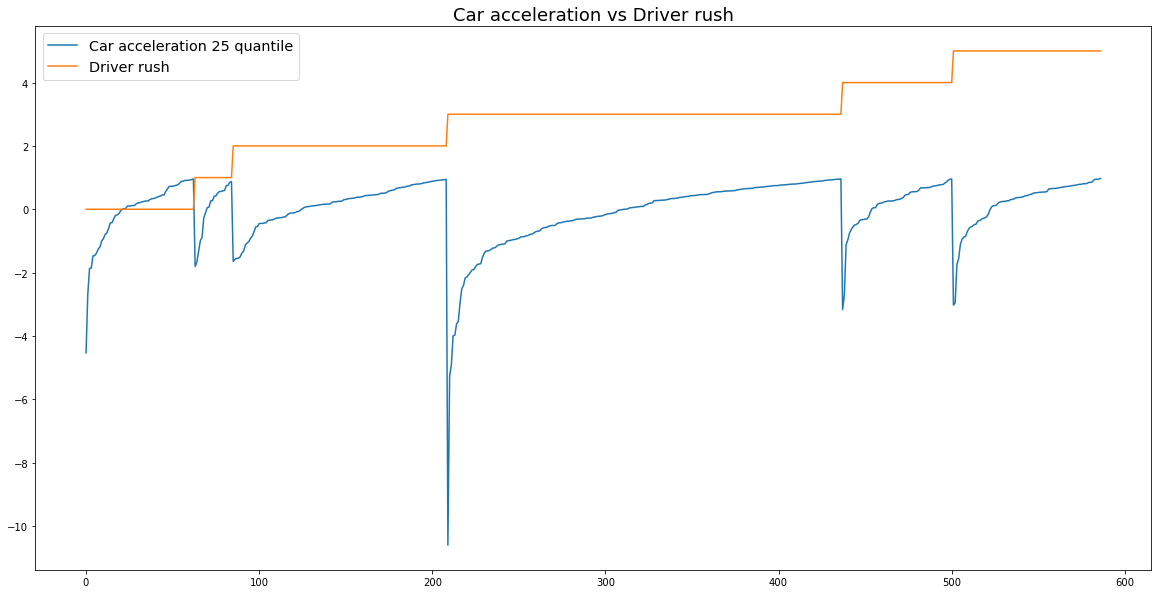

In [15]:
# Plot Car acceleration 25 quantile versus Driver rush
plt.figure(figsize=(20,10))
sorted_braking_df.car_accel_25.plot(label='Car acceleration 25 quantile')
sorted_braking_df.driver_rush.plot(label='Driver rush')
plt.legend(fontsize='x-large')
plt.title('Car acceleration vs Driver rush', fontdict={'fontsize': 18});

In [14]:
# Extract features / target data
y = braking_event_metrics_df.driver_rush
X = braking_event_metrics_df.drop(columns=['driver_rush'])

In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   observations               587 non-null    float64
 1   speed_mean                 587 non-null    float64
 2   speed_std                  587 non-null    float64
 3   speed_min                  587 non-null    float64
 4   speed_25                   587 non-null    float64
 5   speed_50                   587 non-null    float64
 6   speed_75                   587 non-null    float64
 7   speed_max                  587 non-null    float64
 8   car_accel_mean             587 non-null    float64
 9   car_accel_std              587 non-null    float64
 10  car_accel_min              587 non-null    float64
 11  car_accel_25               587 non-null    float64
 12  car_accel_50               587 non-null    float64
 13  car_accel_75               587 non-null    float64

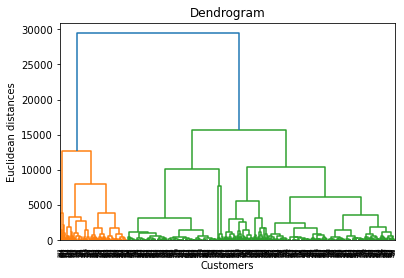

In [15]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
df_pca = pca.fit_transform(X)
df_pca = pd.DataFrame(df_pca)
df_pca.columns = ['P1', 'P2', 'P3']

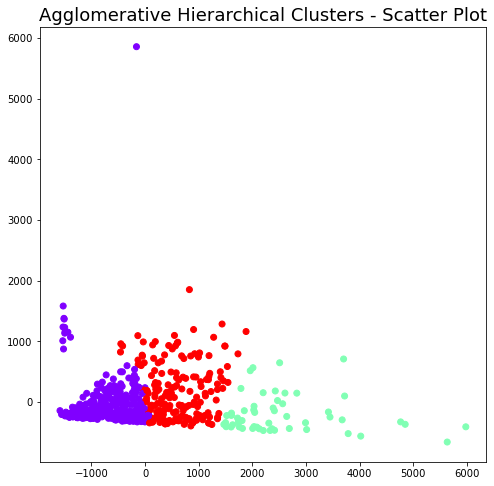

In [17]:
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 3)
plt.figure(figsize =(8, 8))
plt.scatter(df_pca['P1'], df_pca['P2'], c = hc.fit_predict(df_pca), cmap ='rainbow')
plt.title("Agglomerative Hierarchical Clusters - Scatter Plot", fontsize=18)
plt.show()

In [20]:
# Import models
from models.pipeline import BasePipeline
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score, cross_val_predict

In [21]:
# Train  Test Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

Tested Model:  <class 'sklearn.ensemble._forest.RandomForestClassifier'>


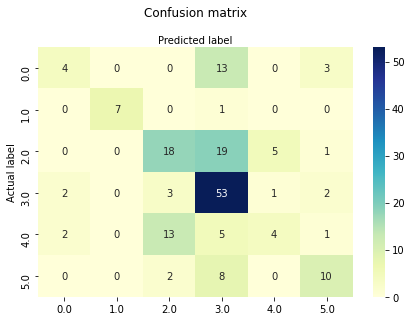

              precision    recall  f1-score   support

         0.0       0.50      0.20      0.29        20
         1.0       1.00      0.88      0.93         8
         2.0       0.50      0.42      0.46        43
         3.0       0.54      0.87      0.66        61
         4.0       0.40      0.16      0.23        25
         5.0       0.59      0.50      0.54        20

    accuracy                           0.54       177
   macro avg       0.59      0.50      0.52       177
weighted avg       0.53      0.54      0.51       177





In [24]:
pipe = BasePipeline(RandomForestClassifier()).make_pipeline()
pipe.fit(X_train, y_train)

y_hat_test = pipe.predict(X_test)

print('======================')
print('Tested Model: ', RandomForestClassifier)
print('======================')
rpt.print_confusion_matrix(y_test, y_hat_test)
print('\n')